# Predicting Hospitalization Costs

Chris Defreitas

Fall 2018

Bryant University

# Data Exploration

### Imports

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('seaborn-talk')
PALETTE = sns.color_palette()
IMG_PATH = 'C:\\Users\\student\\Documents\\Bryant\\4_Senior\\MATH 490 - Capstone\\Presentation\\Graphs\\'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Import dataset

In [4]:
dtype = {'admtype': 'int8',
 'age': 'float16',
 'asource': 'category',
 'campus': 'category',
 'diag_adm': 'category',
 'diag_cat3': 'category',
 'diag_cat4': 'category',
 'er_mode': 'int8',
 'moa': 'int8',
 'pay_ub92': 'int8',
 'provider': 'int8',
 'pt_state': 'category',
 'race': 'int8',
 'sex': 'int8',
 'tot': 'float64',
 'yoa': 'int8'}

In [5]:
# import data using relevant columns and datatypes
df0 = pd.read_csv('df_cleansed2_all.csv', 
                  dtype=dtype
                 )

In [6]:
df0.shape

(1260006, 16)

In [7]:
df0.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,pt_state,diag_adm,campus,er_mode,race,diag_cat3,diag_cat4
0,6,87.0,2,10,2,5,1,7,3412.0,RI,486,0,0,1,486,486
1,6,38.0,1,10,2,5,1,7,4132.0,RI,5128,0,0,1,512,5128
2,6,22.0,2,10,2,5,1,9,12583.0,RI,29650,0,0,1,296,2965
3,6,45.0,2,10,1,5,1,7,17462.0,RI,7850,0,0,1,785,7850
4,6,26.0,2,10,1,5,2,1,10357.0,RI,650,0,0,9,650,650


In [8]:
df1 = df0.copy(deep=True)

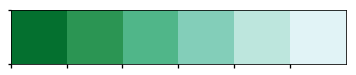

In [68]:
ax = sns.palplot(sns.color_palette("BuGn_r"))

## Descriptive Statistics

In [9]:
df1.describe()

,pay_ub92,age,sex,provider,moa,yoa,admtype,tot,er_mode,race
count,1.260006e+06,1260006.0,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06,1.260006e+06
mean,6.974931e+00,NaN,1.575253e+00,7.722971e+00,6.445280e+00,8.901591e+00,1.794357e+00,2.576076e+04,1.559590e+00,1.712654e+00
std,1.581252e+01,0.0,5.003815e-01,4.464871e+00,3.442302e+00,2.556645e+00,1.039854e+00,4.533506e+04,3.051898e+00,1.805423e+00
min,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,29.0,1.000000e+00,4.000000e+00,3.000000e+00,7.000000e+00,1.000000e+00,8.692000e+03,0.000000e+00,1.000000e+00
50%,4.000000e+00,53.0,2.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,1.000000e+00,1.547300e+04,0.000000e+00,1.000000e+00
75%,6.000000e+00,74.0,2.000000e+00,1.300000e+01,9.000000e+00,1.100000e+01,3.000000e+00,2.809100e+04,1.000000e+00,1.000000e+00
max,9.900000e+01,124.0,9.000000e+00,1.600000e+01,1.200000e+01,1.300000e+01,9.000000e+00,3.080197e+06,9.000000e+00,9.000000e+00


In [10]:

def summary_graph(attr, attr_name=None, df=df1, agg="count", map=None, target='tot', target_name=None, title=None, kind='bar'):
    df= df.copy(deep=True)
    # map
    if map != None:
        df[attr] = df[attr].map(map)
        
    # set label names
    xlabel = attr_name or attr.title()
    ylabel = target_name or target.title()
    title = title or "{} of {}".format(agg, xlabel).title()
    
    data = df.groupby(attr, as_index=True).agg({target: agg})
    print(data)
    print(data.columns)
    
    ax = data[target].plot(kind=kind, title=title)
    ax.set(xlabel=xlabel, ylabel=ylabel)


In [11]:
plt.style.use('seaborn-talk')

            tot
sex            
Female   723734
Male     536136
Unknown     136
Index(['tot'], dtype='object')


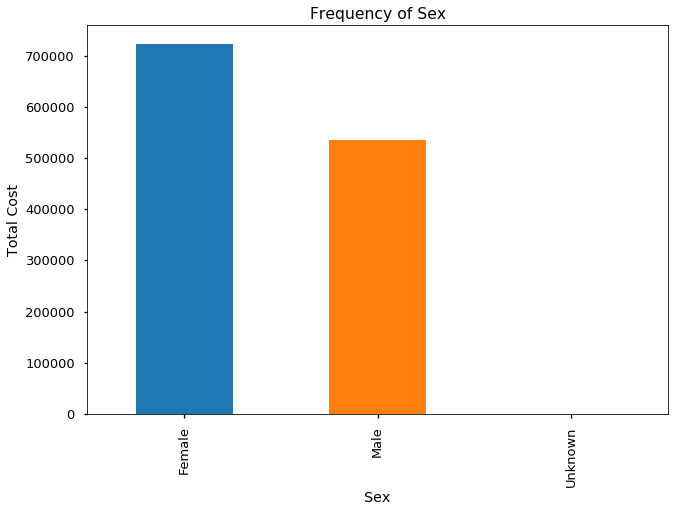

In [12]:
summary_graph('sex', agg="count", map={1: "Male", 2: "Female", 9: "Unknown"}, target_name="Total Cost", 
              title="Frequency of Sex")

                  tot
sex                  
Female   23682.122090
Male     28571.262654
Unknown   7909.941176
Index(['tot'], dtype='object')


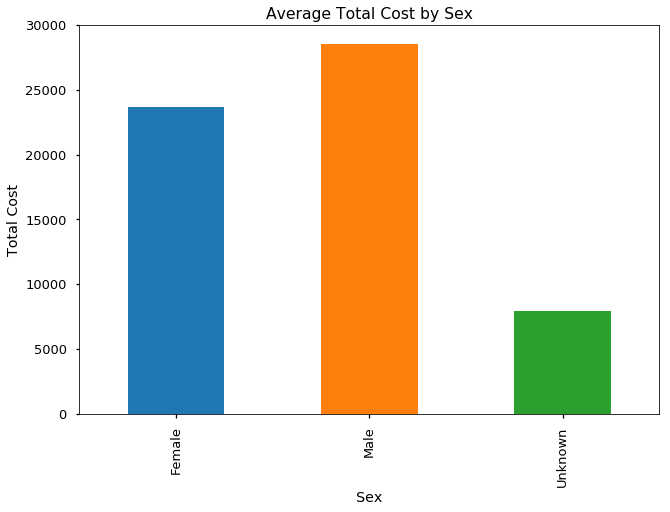

In [13]:
summary_graph('sex', agg="mean", map={1: "Male", 2: "Female", 9: "Unknown"}, target_name="Total Cost", 
              title="Average Total Cost by Sex")

             tot
pay_ub92        
1         356231
2         157042
3          67225
4         158169
5             56
6         220444
7          30726
8          62185
9          95718
10         10379
11          4787
12          6247
13         56201
98           207
99         34389
Index(['tot'], dtype='object')


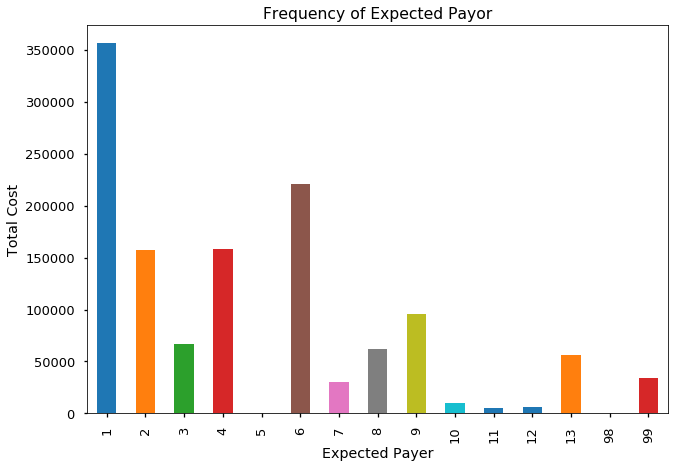

In [14]:
summary_graph('pay_ub92', agg="count", attr_name="Expected Payer", target_name="Total Cost",
             title="Frequency of Expected Payor")

                   tot
pay_ub92              
1         30035.034329
2         30042.247341
3         32040.993321
4         17728.351700
5         10364.946429
6         21800.880355
7         22366.232767
8         25677.923100
9         23126.109551
10        16067.835148
11        31315.911218
12        28022.905395
13        22983.294301
98        23150.753623
99        28820.869900
Index(['tot'], dtype='object')


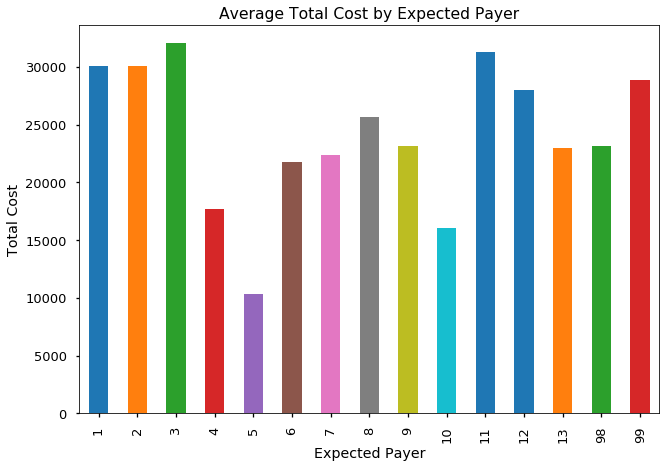

In [15]:
summary_graph('pay_ub92', agg="mean", attr_name="Expected Payer", target_name="Total Cost",
             title="Average Total Cost by Expected Payer")

          tot
race         
1     1018694
2       74552
3       13908
4        1614
5       93697
6       13928
7        1297
9       42316
Index(['tot'], dtype='object')


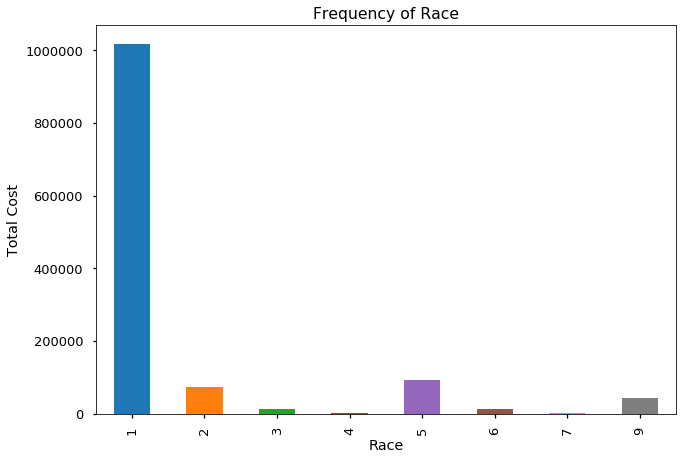

In [16]:
summary_graph('race', agg="count", target_name="Total Cost", 
              title="Frequency of Race")

               tot
race              
1     26322.706644
2     25191.101915
3     22007.950029
4     18165.073730
5     22882.840849
6     25497.221855
7     21973.854279
9     21334.740784
Index(['tot'], dtype='object')


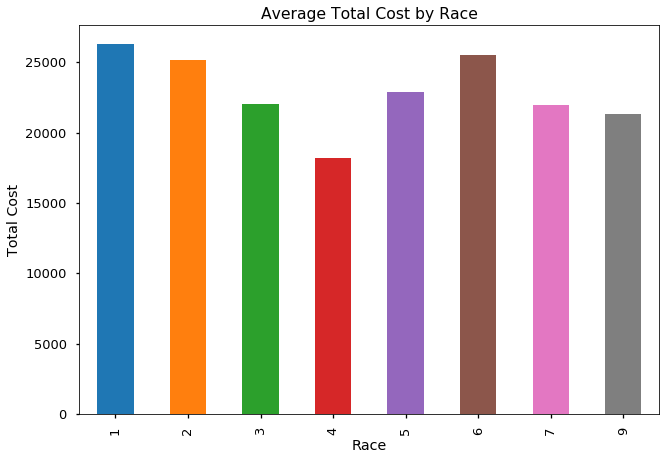

In [17]:
summary_graph('race', agg="mean", target_name="Total Cost",
             title="Average Total Cost by Race")

            tot
er_mode        
0        887156
1        112985
2            54
3           664
4         88571
5          9865
9        160711
Index(['tot'], dtype='object')


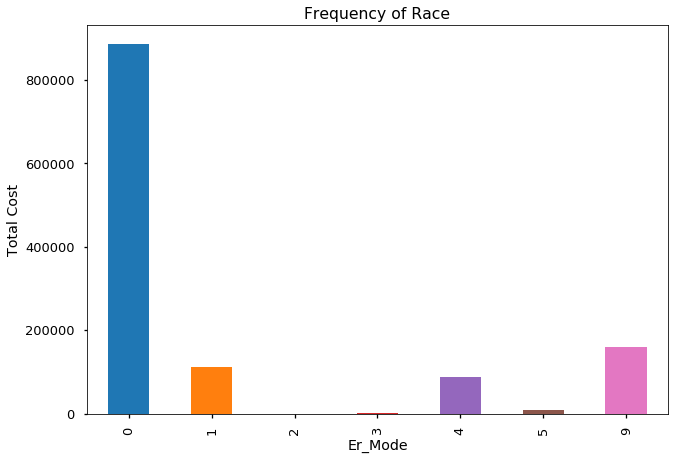

In [18]:
summary_graph('er_mode', agg="count", target_name="Total Cost", 
              title="Frequency of Race")

              tot
admtype          
Electric   228234
Emergency  710938
Newborn    108860
Unknown       839
Urgent     211135
Index(['tot'], dtype='object')


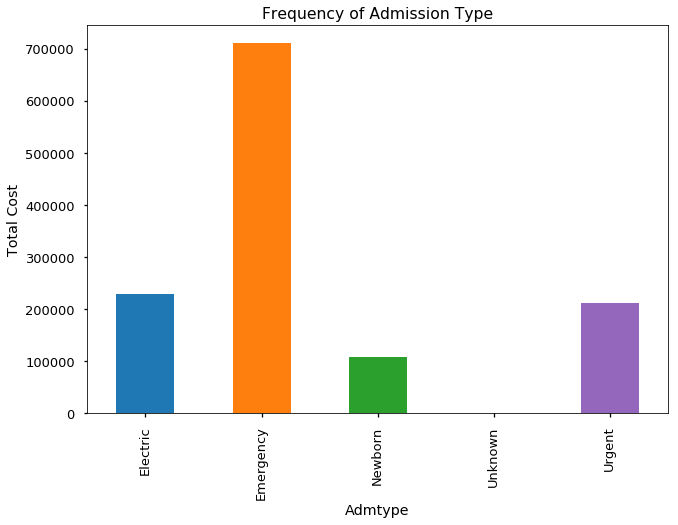

In [19]:
summary_graph('admtype', agg="count", target_name="Total Cost", map={1: "Emergency", 2: "Urgent", 3: "Electric", 4: "Newborn", 5: "Trauma", 9: "Unknown"},
             title="Frequency of Admission Type")

                    tot
admtype                
Electric   29119.199072
Emergency  26354.342581
Newborn    15049.737323
Unknown    18680.200238
Urgent     25682.303716
Index(['tot'], dtype='object')


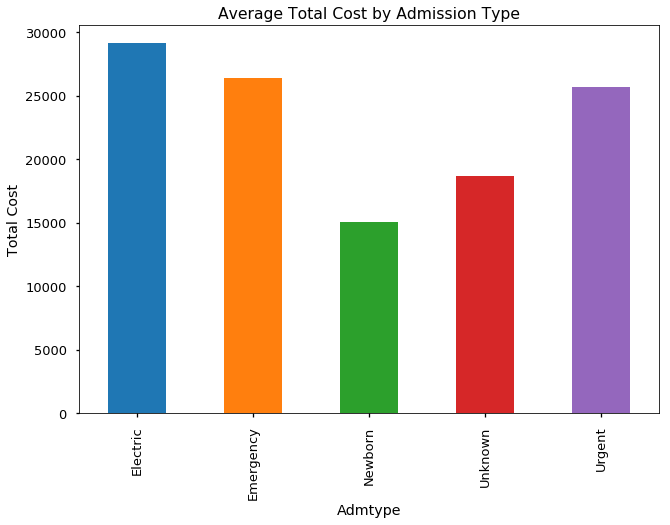

In [20]:
summary_graph('admtype', agg="mean", target_name="Total Cost", map={1: "Emergency", 2: "Urgent", 3: "Electric", 4: "Newborn", 5: "Trauma", 9: "Unknown"},
             title="Average Total Cost by Admission Type")

                    tot
er_mode                
Ambulance        112985
Helicopter           54
Law Enforcement     664
No ER Visit:     887156
Other              9865
Personal          88571
Unknown          160711
Index(['tot'], dtype='object')


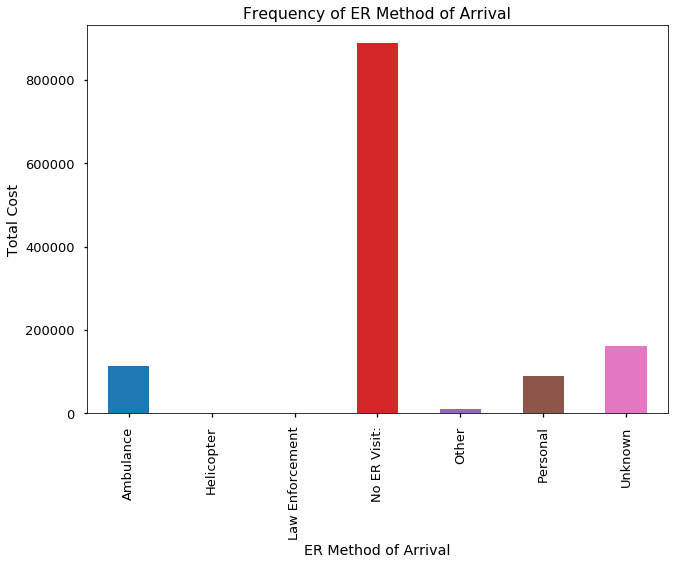

In [21]:
summary_graph('er_mode', attr_name="ER Method of Arrival", agg="count", target_name="Total Cost", map={0: "No ER Visit:", 1: "Ambulance", 2: "Helicopter", 3: "Law Enforcement", 4: "Personal", 5: "Other", 9: "Unknown"},
             title="Frequency of ER Method of Arrival", kind='bar')

                          tot
er_mode                      
Ambulance        25941.119264
Helicopter       80246.148148
Law Enforcement  19071.103916
No ER Visit:     26680.078899
Other            17680.551951
Personal         19809.235495
Unknown          24344.486638
Index(['tot'], dtype='object')


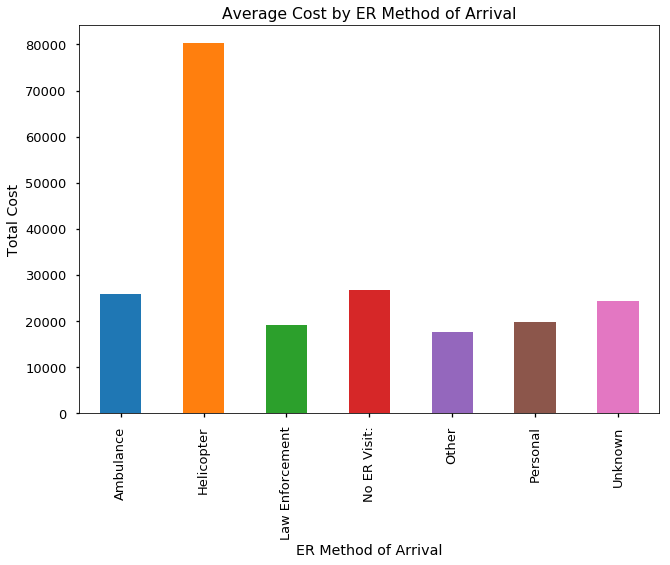

In [22]:
summary_graph('er_mode', attr_name="ER Method of Arrival", agg="mean", target_name="Total Cost", map={0: "No ER Visit:", 1: "Ambulance", 2: "Helicopter", 3: "Law Enforcement", 4: "Personal", 5: "Other", 9: "Unknown"},
             title="Average Cost by ER Method of Arrival")

## Correlation for Continuous Data

In [23]:
data = df1[['age', 'sex', 'yoa', 'moa', 'tot']]

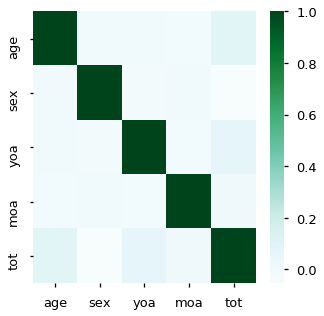

In [24]:
plt.figure(figsize=(5,5)) 
sns.heatmap(data.corr(), cmap='BuGn')

## Age to Total Cost

In [25]:
bins = (0, 1, 5, 11, 18, 25, 35, 66, 85, 129) 
group_names = ['Newborn', 'Toddler', 'Child', 'Teenager', 'Student',
    'Young Adult', 'Adult', 'Senior', 'Elder'] 
categories = pd.cut(df1.age, bins, labels=group_names) 
df1 = df1.assign(age_groups=categories)

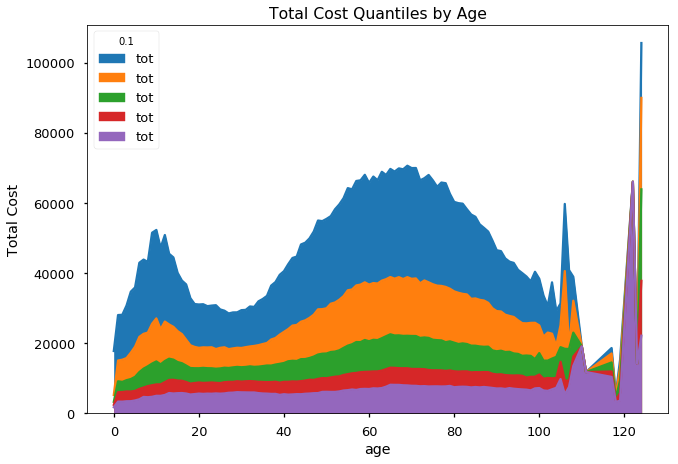

In [26]:
gb = df1[['age', 'tot']].groupby('age')
quants = [gb.quantile(i) for i in [.90, .75, .5, .25, .1]]

fig, ax = plt.subplots()
ax.set_ylabel('Total Cost')
ax.set_title('Total Cost Quantiles by Age')
for q in quants:
    q.plot.area(ax=ax)

In [27]:
def graph_quantiles(df, attr, quants):
    gb = df[[attr, 'tot']].groupby(attr, as_index=True).quantile(quants).unstack()
    print(df[[attr, 'tot']].groupby(attr, as_index=True).count())
    fig, ax = plt.subplots()
    ax.set_ylabel('Total Cost')
    #ax.set_xticks(group_names)
    ax.set_title('Total Cost Quantiles by {}'.format(attr))
    gb.plot.bar(ax=ax, stacked=True, width=1)

                tot
age_groups         
Newborn        5802
Toddler       11590
Child         13955
Teenager      39882
Student       71341
Young Adult  123075
Adult        437493
Senior       319479
Elder        110316


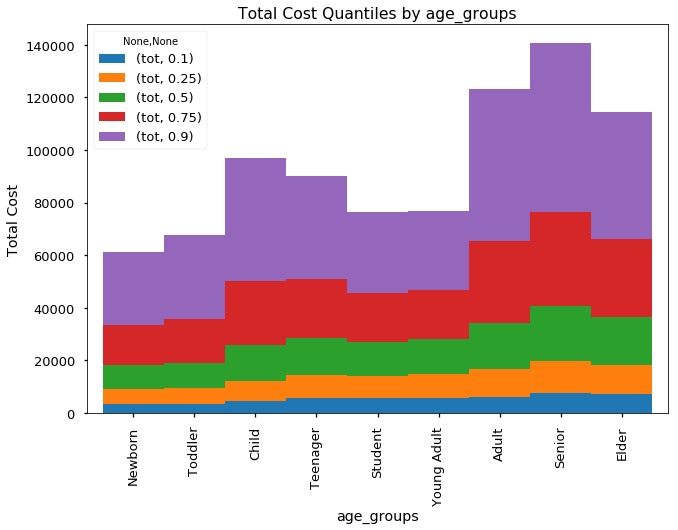

In [28]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'age_groups', quants)

             tot
provider        
1          51949
2          80446
3          60878
4         133516
5         308331
6          70552
9          50572
10        144030
11         38913
12          5289
13         66166
14        194959
15         10539
16         43866


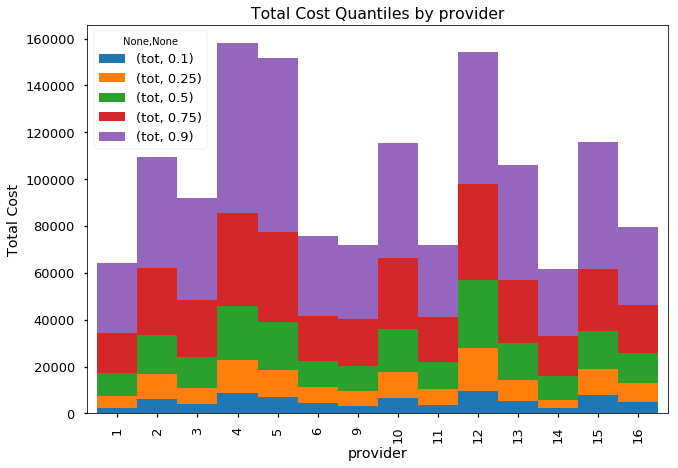

In [29]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'provider', quants)

        tot
moa        
1    109918
2    100164
3    110106
4    105376
5    107111
6    105428
7    106230
8    105045
9    102788
10   105480
11   101282
12   101078


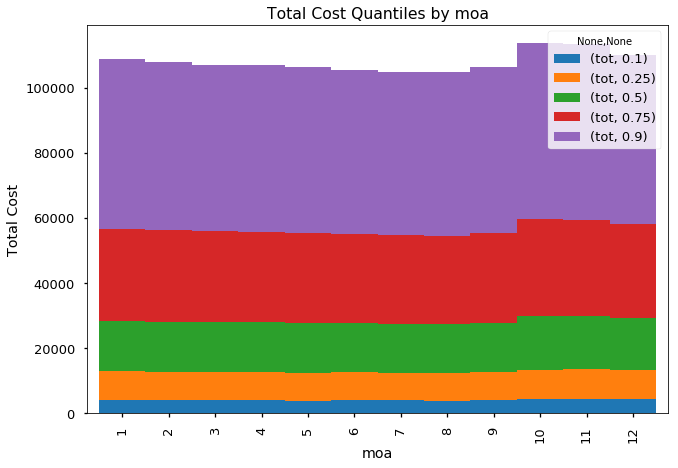

In [30]:
quants = [.1, .25, .5, .75, .9]
graph_quantiles(df1, 'moa', quants)

## Explore some diagnoses

In [31]:
def plot_diags(attr, names, attr_name=None, target='tot', target_name=None,  title=None, scale='area'):
    # filter
    dfi = df1[df1[attr].isin([*names])]
    dfi[attr] = dfi[attr].cat.remove_unused_categories()
    
    # map codes to names
    dfi[attr] = dfi[attr].map(names)
        
    # graph
    ax = sns.violinplot(x=dfi[attr], y=dfi[target], cut=0, scale=scale)
    
    # format
    target_name, attr_name = target_name or target, attr_name or attr
    ax.set_title(title or "{} by {}".format(target_name, attr_name))
    ax.set_xlabel(attr_name)
    ax.set_ylabel(target_name)

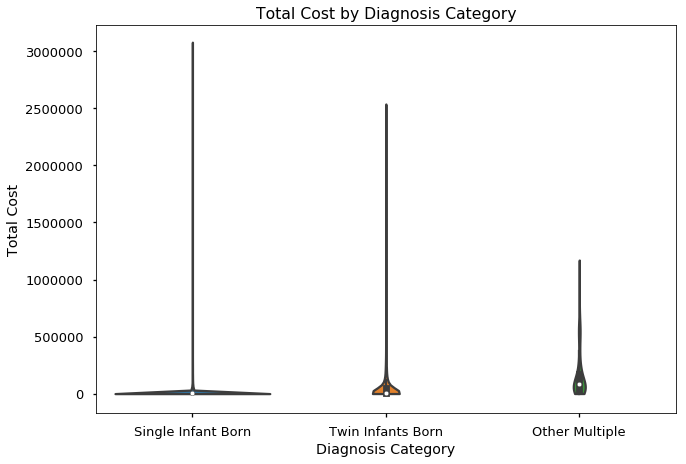

In [32]:
names = {'V30': "Single Infant Born",
         'V31': "Twin Infants Born",
         'V34': "Other Multiple",
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost')
          

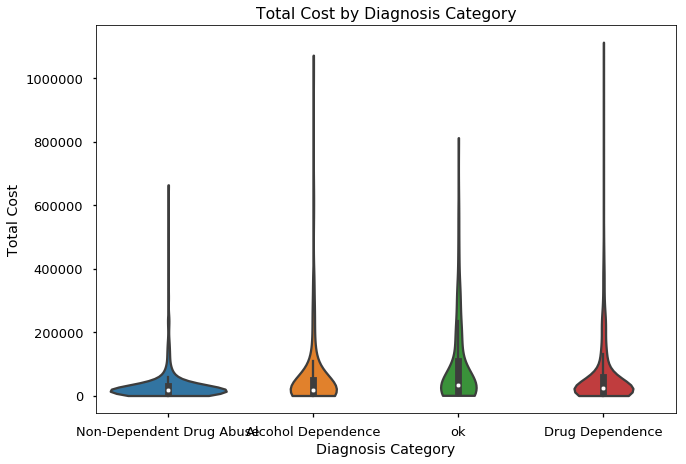

In [33]:
names = {'800': "Alcohol Dependence",
         '801': "Drug Dependence",
         '802': "Non-Dependent Drug Abuse",
         '803': "ok"
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost')
          

In [34]:
pd.DataFrame(df1['diag_adm'].describe())

,diag_adm
count,1260006
unique,6633
top,V3000
freq,75222


Most Common Diagnosis

In [35]:
names = {'V3000': "Single Birth",
         'V3001': "Single Birth Cesarean",
         '486': "Pneumonia",
         '78650': "Chest Pain",
         '64413': "Threatened Labor",
         '311': "Depression",
         '78605': "Shortness of Breath",
         '29690': "Other Mood Disorder",
         '4280': "Congestive Heart Failure",
         '7802': "Loss of Consciousness"
        }

In [36]:
# set font
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['font.sans-serif'] = 'Helvetica'
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


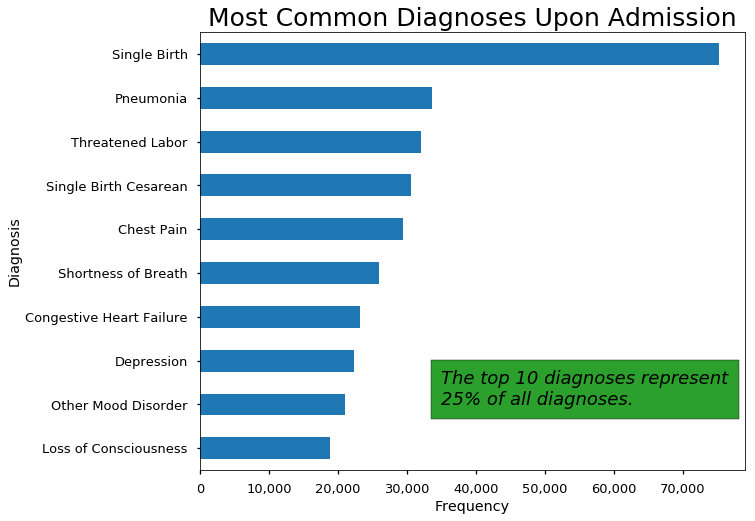

In [37]:
fig, ax = plt.subplots()

gb = df1[['diag_adm', 'tot']].groupby('diag_adm').count()
gb = gb.sort_values(by='tot', ascending=False).head(10).sort_values(by='tot')

gb.index = gb.index.map(names)
gb.plot(kind='barh', ax=ax)
# format
ax.set_title("Most Common Diagnoses Upon Admission")
ax.set_xlabel("Frequency")
ax.set_ylabel("Diagnosis")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.get_legend().remove()

top_10_pct = round(gb['tot'].sum() / len(df1), 2) * 100

msg = "The top 10 diagnoses represent\n{}% of all diagnoses.".format(int(top_10_pct))
ax.text(35000, 1, msg, style='italic', fontsize=18,
        bbox={'facecolor': PALETTE[2], 'alpha':1, 'pad':10})

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.savefig(IMG_PATH + 'Top 10 Diagnoses.png', dpi=200)

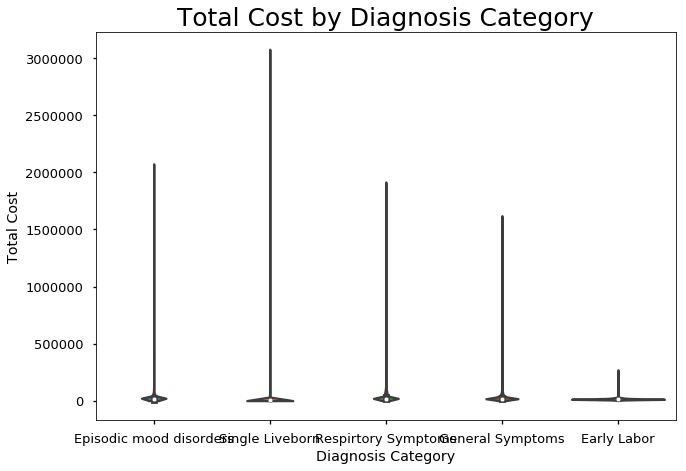

In [38]:
names = {'V30': "Single Liveborn",
         '786': "Respirtory Symptoms",
         '780': "General Symptoms",
         '296': "Episodic mood disorders",
         '644': "Early Labor"
      }
plot_diags('diag_cat3', names=names, attr_name='Diagnosis Category', target_name='Total Cost')#, scale='width')

## Exploration of Target

In [39]:
desc = df1.tot.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

In [40]:
pd.DataFrame(desc.round())

,tot
count,1260006.0
mean,25761.0
std,45335.0
min,1.0
1%,1571.0
10%,4132.0
25%,8692.0
50%,15473.0
75%,28091.0
90%,51524.0


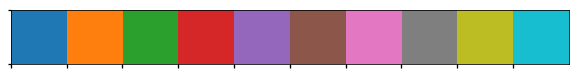

In [53]:
sns.palplot(sns.color_palette())

Number of records with negative cost

In [41]:
df1.tot[df1.tot < 0].count()

0

In [52]:
sns.palletteplot()

AttributeError: module 'seaborn' has no attribute 'palletteplot'

Histogram of total cost

'skew: 13.64'

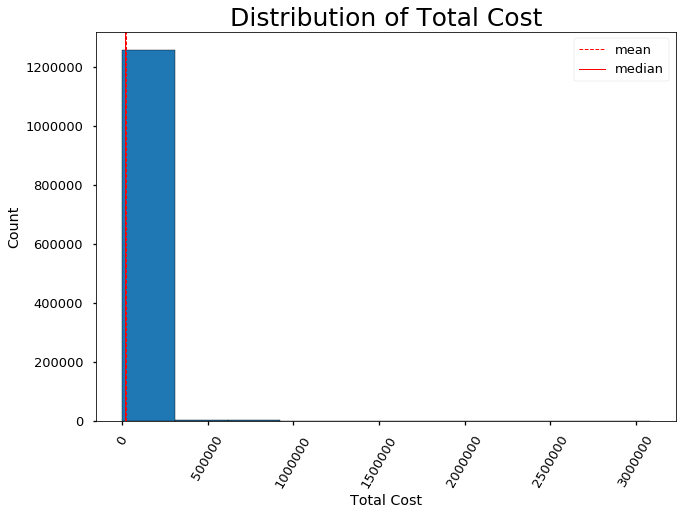

In [42]:
data = df1['tot']
#bins=range(-5000, 110000, 5000)
plt.hist(data, edgecolor='k')
ax = plt.gca()
plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color='r', linestyle='--', linewidth=1),
         plt.axvline(df1['tot'].median(), color='r', linestyle='-', linewidth=1)]

ax.legend(lines, ['mean', 'median'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Count')
plt.xticks(rotation=60)
skw = round(df1['tot'].skew(), 2)
"skew: {}".format(skw)

'*Last bin includes all values above $100,000.'

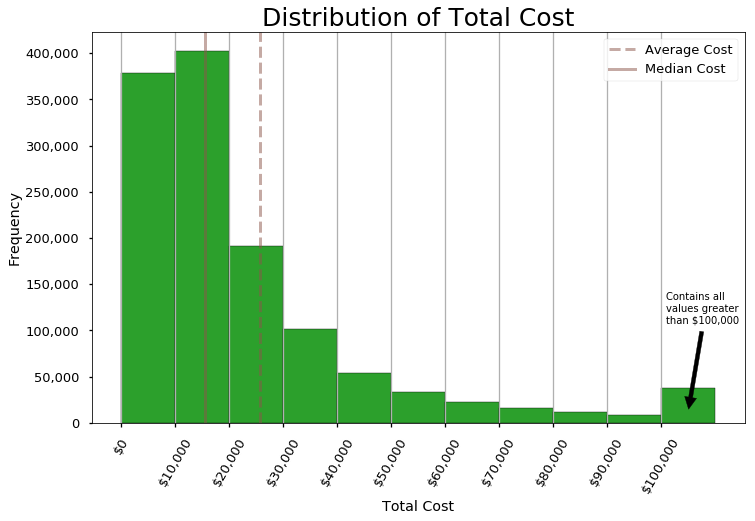

In [54]:
fig, ax = plt.subplots()

data = df1['tot'].where(df1['tot']<=100000, other=110000)
bins=range(0, 120000, 10000)

plt.hist(data, bins=bins, color=PALETTE[2], edgecolor='k')
ax.set_xticks(np.arange(0, 110000, step=10000))

plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color=PALETTE[5], linestyle='--', linewidth=3, alpha=.5),
         plt.axvline(df1['tot'].median(), color=PALETTE[5], linestyle='-', linewidth=3, alpha=.5)]

ax.legend(lines, ['Average Cost', 'Median Cost'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Frequency')
plt.xticks(rotation=60)

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.grid(None, axis='x')

ax.annotate('Contains all\nvalues greater\nthan $100,000', xy=(105000, 10000), xytext=(101000, 108000),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.savefig(IMG_PATH + 'Target Distribution.png', dpi=200)
"*Last bin includes all values above $100,000."

'*Last bin includes all values above $100,000.'

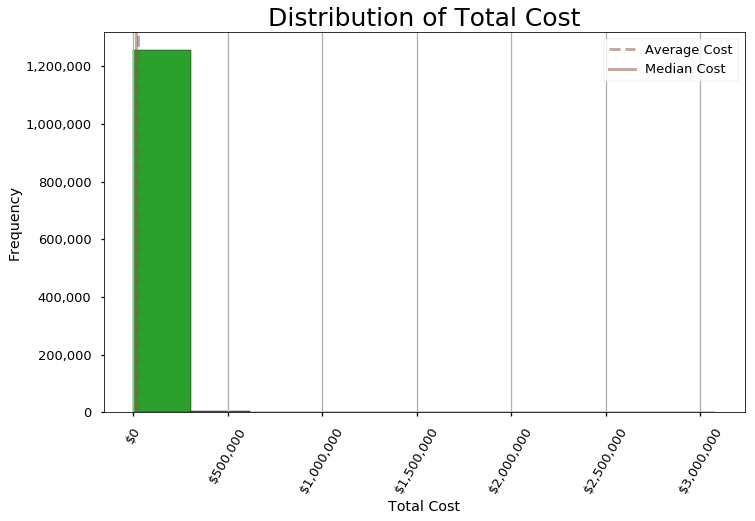

In [56]:
fig, ax = plt.subplots()

data = df1['tot']#.where(df1['tot']<=100000, other=110000)
#bins=range(0, 120000, 10000)

plt.hist(data, color=PALETTE[2], edgecolor='k')
#ax.set_xticks(np.arange(0, 110000, step=10000))

plt.title('Distribution of Total Cost')
lines = [plt.axvline(df1['tot'].mean(), color=PALETTE[5], linestyle='--', linewidth=3, alpha=.5),
         plt.axvline(df1['tot'].median(), color=PALETTE[5], linestyle='-', linewidth=3, alpha=.5)]

ax.legend(lines, ['Average Cost', 'Median Cost'])

ax.set_xlabel('Total Cost')
ax.set_ylabel('Frequency')
plt.xticks(rotation=60)

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.grid(None, axis='x')

#ax.annotate('Contains all\nvalues greater\nthan $100,000', xy=(105000, 10000), xytext=(101000, 108000),
#            arrowprops=dict(facecolor='black', shrink=0.05))


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.savefig(IMG_PATH + 'Skewed Target Distribution.png', dpi=200)
"*Last bin includes all values above $100,000."

In [45]:
def graph_tgt(x, condition, y='tot'):
    df = df1[df1[x]==condition]
    tot_graph = df[y].where(df[y]<100000, other=120000)
    tot_graph.hist(alpha=.5)
    print(df[y].skew())
    print(len(tot_graph))

12.262147318738055
536136
15.018538831866557
723734


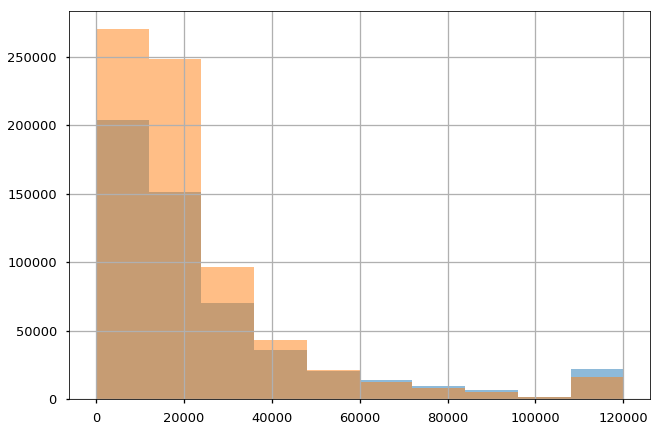

In [46]:
graph_tgt('sex', condition=1)
graph_tgt('sex', condition=2)

13.508546988718493
887156
13.869845469574614
160711
10.305574829556887
112985
10.147526537803472
9865
7.489012487185447
664
15.801334431782179
88571
4.385237838834739
54


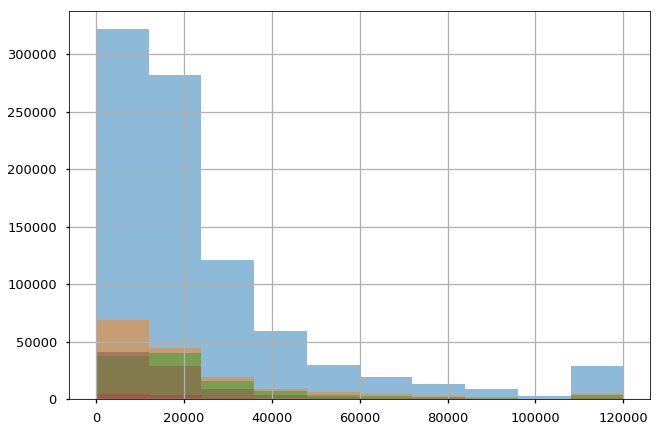

In [47]:
for a in df1.er_mode.unique():
    graph_tgt('er_mode', condition=a)

## Graph

(1, 6513536.730276916)

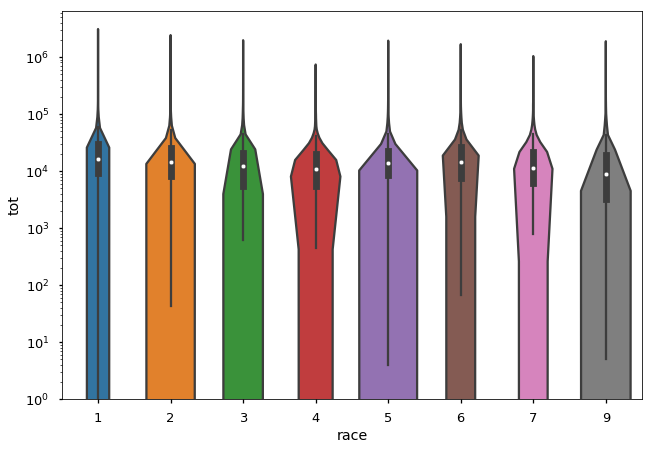

In [48]:

g = sns.violinplot(x="race", y="tot", data=df1)
#g = sns.catplot(x="er_mode", y="tot", data=df1)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set_ylim(bottom=1)

In [49]:
diag_cat = df1.diag_adm.astype(str).str[:3]
df1 = df1.assign(diag_cat=diag_cat.values)

In [50]:
top_diag_cat = df1.groupby(['diag_cat']).size().reset_index(name='counts').sort_values(by=['diag_cat'], ascending=False)
tc = top_diag_cat.nlargest(n=50, columns='counts')
print(tc)
print(tc.counts.sum())
top_cats = list(tc.diag_cat)

    diag_cat  counts
879      V30  106023
654      786   82636
648      780   69801
219      296   54386
657      789   38932
523      644   37139
387      486   33600
337      428   26425
586      715   25486
234      311   22359
559      682   20810
336      427   20085
481      599   17722
655      787   17211
391      491   16772
461      578   15452
199      276   14243
226      303   12533
343      434   11289
533      654   11164
529      650   11019
321      410   10982
687      820   10739
595      724   10460
218      295   10291
325      414    9902
393      493    9632
176      250    9583
467      584    8847
221      298    8559
445      560    8525
25       038    7866
849      996    7821
537      658    7491
600      729    7438
543      664    7415
446      562    7359
593      722    7261
411      518    6803
652      784    6565
460      577    6516
322      411    6513
208      285    6445
871      V22    6333
433      540    5947
899      V57    5910
227      304 

In [ ]:
print(top_diag_cat.counts[top_diag_cat.counts > 10000].count())
print(top_diag_cat.counts.count())
print(top_diag_cat[top_diag_cat.counts > 10000])

In [ ]:
df = df1[df1.diag_cat == '410']

gb = df.groupby('diag_cat4')['tot'].agg(['mean','count'])
print(gb[gb > 0].sort_values(by='count',ascending=False))

In [ ]:
mod = ols('tot ~ diag_adm', data=df).fit()
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

## ANOVA for diag_adm

In [ ]:
#mod = ols('tot ~ diag_adm', data=df3_arrival).fit()

In [ ]:
#aov_table = sm.stats.anova_lm(mod, tpy=2)
#print(aov_table)

In [ ]:
#                df        sum_sq       mean_sq          F  PR(>F)
#diag_adm    6639.0  1.238547e+14  1.865563e+10  12.227963     0.0
#Residual  459800.0  7.014952e+14  1.525653e+09        NaN     NaN

In [ ]:
mod = ols('tot ~ sex', data=df1).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

In [ ]:
mod = ols('tot ~ er_mode', data=df1).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

In [ ]:
mod = ols('tot ~ moa', data=df1).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod, tpy=2)
print(aov_table)

In [ ]:
cxx = ['sex', 'age', 'provider', 'diag_adm', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'poa1', 'poa2', 'poa3', 'poa4', 'poa5']
df3_preview = df3_arrival.filter(items=cxx, axis='columns')

#### Filter on the most frequent diag_adm

In [ ]:
#df3_arrival.to_csv("df3_arrival.csv")

## Encoding All dx categories Present on Admission

In [ ]:
print(df0.columns)

In [ ]:
dxs = ["dx{}_trim".format(i) for i in range(1, 26)]
dxs.append('diag_adm_trim')
dx_uniques = top_cats #list(diag_cats)

In [ ]:
print(len(dxs))
print(len(dx_uniques))

In [ ]:
df_diag = pd.DataFrame(index=df0.index, columns=dx_uniques)
#df_diag = df_diag.fillna(0)

In [ ]:
codes = dx_uniques
for code in codes:
    df_diag[code] = (code == df0['diag_adm_trim']) | (code == df0['dx1_trim']) | (code == df0['dx2_trim']) | (code == df0['dx3_trim']) | (code == df0['dx4_trim']) | (code == df0['dx5_trim']) | (code == df0['dx6_trim']) | (code == df0['dx7_trim']) | (code == df0['dx8_trim']) | (code == df0['dx9_trim']) | (code == df0['dx10_trim']) | (code == df0['dx11_trim']) | (code == df0['dx12_trim']) | (code == df0['dx13_trim']) | (code == df0['dx14_trim']) | (code == df0['dx15_trim']) | (code == df0['dx16_trim']) | (code == df0['dx17_trim']) | (code == df0['dx18_trim']) | (code == df0['dx19_trim']) | (code == df0['dx20_trim']) | (code == df0['dx21_trim']) | (code == df0['dx22_trim']) | (code == df0['dx23_trim']) | (code == df0['dx24_trim']) | (code == df0['dx25_trim'])

In [ ]:
print(df_diag.sum())

In [ ]:
df0_hot = pd.concat([df0, df_diag], axis=1)

In [ ]:
df0_hot.head(5)

In [ ]:
#print(df_5_hot.iloc[0])

In [ ]:
print(list(df0_hot.columns))

In [ ]:
drop_cols = ["dx{}".format(i) for i in range(1,26)]
drop_cols.append("diag_adm")
drop_cols.extend(dxs)
print(drop_cols)

In [ ]:
df0_hot = df0_hot.drop(drop_cols, axis=1)

In [ ]:
df0_hot.head()

## One-Hot Encoding for Other Categorical Variables

In [ ]:
df_copy = df0_hot.copy()

In [ ]:
print(df_copy.columns)

In [ ]:
fields = ['er_mode', 'admtype', 
          #'diag_adm', 
          'pay_ub92', 'provider', 'asource', 'race']

df6_encoded = pd.get_dummies(df_copy, columns=fields, prefix=fields)

print(df6_encoded.shape)

In [ ]:
df6_encoded.head()

In [ ]:
df_sample = df6_encoded.sample(10000, random_state=0)


In [ ]:
df_sample.to_csv("df_sample_coded.csv")

In [ ]:
df6_encoded.to_csv("df_encoded.csv")